<a href="https://colab.research.google.com/github/PineMi/LogisticRegression/blob/main/Logistic_Regression_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
<i>Supervised Learning - Classification Algorithms</i>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Libraries used to generate synthetic data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Logistic regression class
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        """
        Train the logistic regression model.
        X: Input features (n_samples x n_features)
        y: Labels (n_samples,)
        """
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.num_iterations):
            # Linear model
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            # Compute the cost (log loss)
            loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
            self.losses.append(loss)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print loss every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Make predictions for input data X.
        """
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return (y_pred >= 0.5).astype(int)

    def plot_decision_boundary(self, X, y):
        """
        Visualize the decision boundary.
        """
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = sigmoid(np.dot(grid, self.weights) + self.bias).reshape(xx.shape)

        plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap="RdYlBu", alpha=0.6)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k", s=20)
        plt.title("Decision Boundary")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.xticks([])
        plt.yticks([])
        plt.show()



    def plot_loss(self):
        """
        Plot the loss curve over iterations.
        """
        plt.plot(range(self.num_iterations), self.losses, label="Loss")
        plt.title("Log Loss Over Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Log Loss")
        plt.legend()
        plt.show()

Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.2846
Iteration 200, Loss: 0.2557
Iteration 300, Loss: 0.2463
Iteration 400, Loss: 0.2420
Iteration 500, Loss: 0.2396
Iteration 600, Loss: 0.2381
Iteration 700, Loss: 0.2371
Iteration 800, Loss: 0.2363
Iteration 900, Loss: 0.2357
Accuracy: 0.90


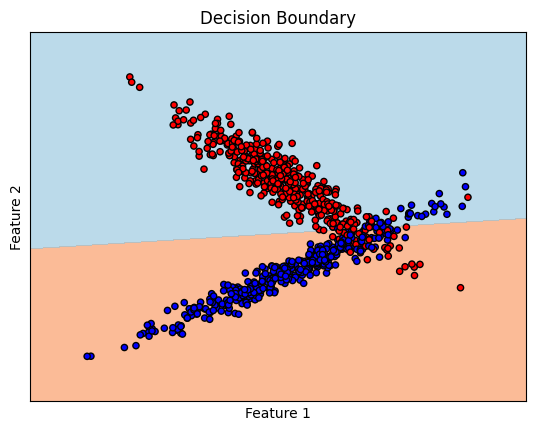

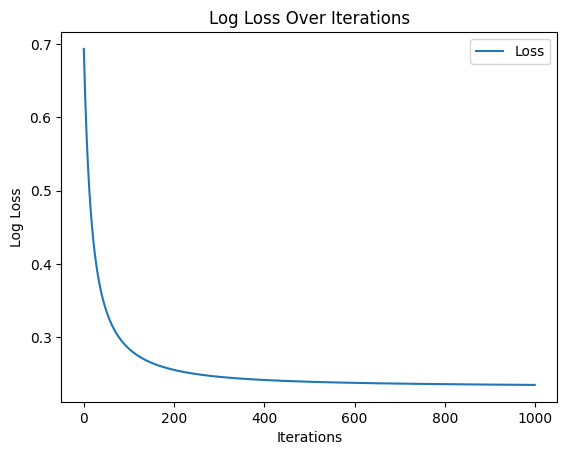

In [ ]:
# Create a binary classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

# Split dataset (Train/Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

model.plot_decision_boundary(X_train, y_train)
model.plot_loss()